# CSE 258 Assigment 2

## Import Packages

In [1]:
! pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 50.6 MB/s eta 0:00:00


In [2]:
import os
import zipfile
import pandas
import csv
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
import scipy
from implicit import bpr
from sklearn import linear_model

# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/CSE258-Final'


/usr/local/lib/python3.10/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


Mounted at /content/drive


## Import Dataset

In [3]:
archive = zipfile.ZipFile('dataset.zip', 'r')
archive.extractall()

In [4]:
moive_genre = []
movie_reviews = []
for filename in archive.namelist():
    if "1_movies_per_genre" in filename:
        moive_genre.append(filename)
    else:
        movie_reviews.append(filename)
moive_genre.pop(0)
movie_reviews.pop(0)

'2_reviews_per_movie_raw/'

In [5]:
data_dict = {}
for f in movie_reviews:
    with open(f, mode ='r') as file:
        csv_reader = csv.DictReader(file)
        data_dict[f[24:-9]] = [row for row in csv_reader]

genre_dict = {}
for f in moive_genre:
    with open(f, mode ='r') as file:
        csv_reader = csv.DictReader(file)
        genre_dict[f[19:-4]] = [row for row in csv_reader]

print(data_dict["The Young Victoria"])
print(genre_dict["Action"])

[{'username': 'JamesHitchcock', 'rating': '8', 'helpful': '148', 'total': '167', 'date': '23 March 2009', 'title': ' A touching romance and a gripping human drama\n', 'review': 'Apart from having the longest reign in British history (63 years), Queen Victoria also holds two other distinctions. She was, apart from our current Queen, the oldest ever British monarch, living to the age of 81. And she was also the youngest ever British (as opposed to English or Scottish) monarch, coming to the throne as a girl of eighteen. And yet whenever television or the cinema make a programme or film about her, they seem far more interested in the older Victoria than they do in the young girl; the version of Victoria with which modern audiences will probably be most familiar is Judi Dench in "Mrs Brown". "The Young Victoria" tries to redress the balance by showing us the events surrounding her accession and the early years of her reign. It has the rare distinction of being produced by a former Royal, S

In [6]:
moviesPerUser = defaultdict(set)
usersPerMovie = defaultdict(set)
ratingPerUser = defaultdict(list)
ratingPerMovie = defaultdict(list)
yearRating = defaultdict(list)
movieUserPair = set()
users = set()
movies = set()
data = []
betaU_dict = {}
betaI_dict = {}
movie_ratings = []
userIDs, movieIDs = {}, {}

for movie, comments in data_dict.items():
    movies.add(movie)
    if not movie in movieIDs: movieIDs[movie] = len(movieIDs)
    for comment in comments:
        user = comment["username"]
        data.append(comment)
        data[-1]["moviename"] = movie
        users.add(user)
        moviesPerUser[user].add(movie)
        usersPerMovie[movie].add(user)
        if not user in userIDs: userIDs[user] = len(userIDs)
        if comment["rating"] != "Null":
            rating = int(comment["rating"])
            yearRating[comment["date"][-4:]].append(rating)
            ratingPerUser[user].append(rating)
            ratingPerMovie[movie].append(rating)
            betaU_dict[user] = [betaU_dict.get(user, [0.0, 0])[0] + rating, betaU_dict.get(user, [0.0, 0])[1] + 1]
            betaI_dict[movie] = [betaI_dict.get(movie, [0.0, 0])[0] + rating, betaI_dict.get(movie, [0.0, 0])[1] + 1]
            movie_ratings.append({"user": user, "movie": movie, "rating": rating})

print(moviesPerUser["JamesHitchcock"])
print(usersPerMovie["The Young Victoria"])

{'Walk the Line', 'Blue Crush', '12 Years a Slave', 'Black Swan', 'The Elephant Man', 'Zodiac', 'Dead Poets Society', 'Casablanca', 'The Pianist', 'The Italian Job', 'The Devil Wears Prada', 'To Kill a Mockingbird', 'The Wizard of Oz', 'Battleship Potemkin', 'Signs', 'Annie Hall', 'Lincoln', 'Pretty Woman', 'Harry Potter and the Chamber of Secrets', 'Dunkirk', "Harry Potter and the Sorcerer's Stone", 'Elizabeth: The Golden Age', 'Vertigo', 'Slumdog Millionaire', 'Eternal Sunshine of the Spotless Mind', 'Gangs of New York', 'Good Morning, Vietnam', 'Rear Window', 'The Greatest Showman', 'Alexander', 'V for Vendetta', 'A Clockwork Orange', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb', 'The Illusionist', "Monty Python's Life of Brian", 'Saving Private Ryan', 'The Rock', 'Dirty Dancing', 'I, Tonya', 'The Young Victoria', 'Harry Potter and the Deathly Hallows: Part 2', 'Mission: Impossible', 'Lock, Stock and Two Smoking Barrels', 'Notting Hill', 'Gone Girl', 'Crouc

In [7]:
moviesPerGenre = defaultdict(set)
genresPerMovie = defaultdict(set)
genres = set()

for genre, movies in genre_dict.items():
    genres.add(genre)
    for movieinfo in movies:
        movie = movieinfo['name']
        moviesPerGenre[genre].add(movie)
        genresPerMovie[movie].add(genre)

print(genresPerMovie["The Dark Knight"])
print(moviesPerGenre["Action"])

{'Action', 'Crime', 'Drama'}
{'The Bourne Identity', 'X-Men: Days of Future Past', 'The Hunger Games', 'Dunkirk', 'Thor: The Dark World', 'Star Wars: Episode VII - The Force Awakens', 'V for Vendetta', 'Terminator 2: Judgment Day', "Pirates of the Caribbean: Dead Man's Chest", 'Inception', 'Avengers: Age of Ultron', 'Watchmen', 'Star Wars: Episode III - Revenge of the Sith', 'Kill Bill: Vol. 1', 'Spider-Man', 'Lock, Stock and Two Smoking Barrels', 'The Dark Knight Rises', 'Star Wars: Episode I - The Phantom Menace', 'World War Z', 'Iron Man 3', 'Wonder Woman', 'Mad Max: Fury Road', 'Logan', 'Thor: Ragnarok', 'John Wick', "Pirates of the Caribbean: At World's End", '300', 'Guardians of the Galaxy Vol. 2', 'Suicide Squad', 'Spider-Man: Homecoming', 'X-Men: First Class', 'Doctor Strange', 'Transformers', 'The Incredibles', 'The Revenant', 'District 9', 'Iron Man 2', 'Batman v Superman: Dawn of Justice', 'Rogue One: A Star Wars Story', 'The Bourne Ultimatum', 'Kill Bill: Vol. 2', 'Avengers

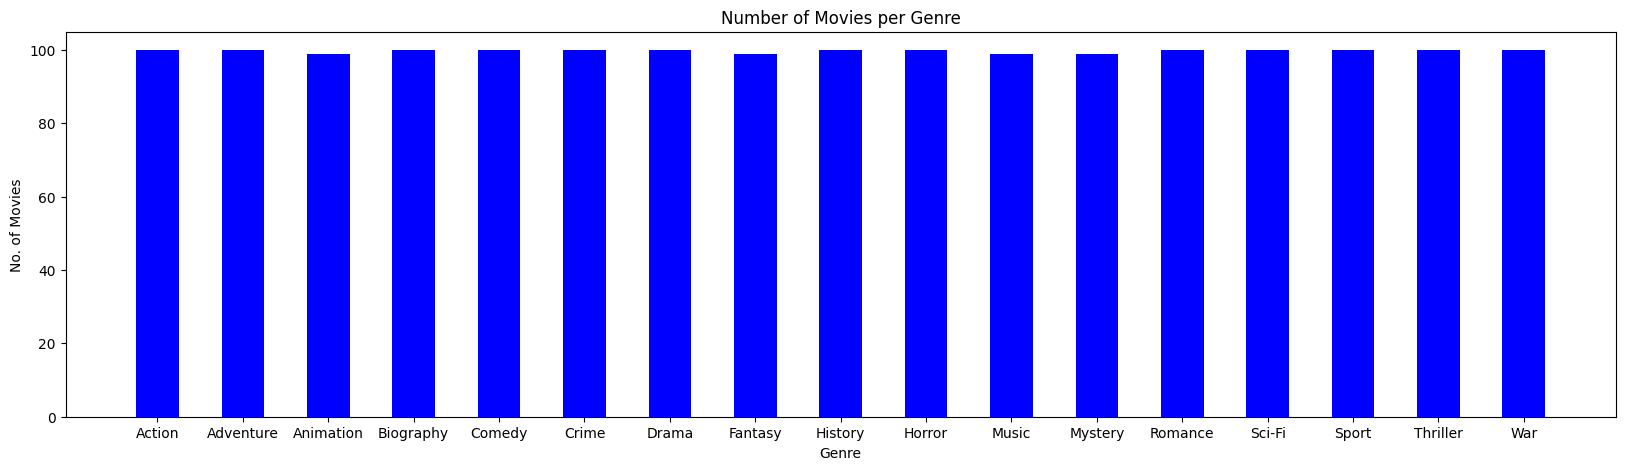

In [10]:
x = []
y = []
for key, value in moviesPerGenre.items():
    x.append(key)
    y.append(len(value))

fig = plt.figure(figsize = (20, 5))
plt.bar(x, y, color ='blue', width = 0.5)
plt.xlabel("Genre")
plt.ylabel("No. of Movies")
plt.title("Number of Movies per Genre")
plt.show()

{'username': 'MR_Heraclius', 'rating': '10', 'helpful': '85', 'total': '92', 'date': '12 February 2020', 'title': ' The Dark Knight\n', 'review': 'Confidently directed, dark, brooding, and packed with impressive action sequences and a complex story, The Dark Knight includes a career-defining turn from Heath Ledger as well as other Oscar worthy performances, TDK remains not only the best Batman movie, but comic book movie ever created.', 'moviename': 'The Dark Knight'}


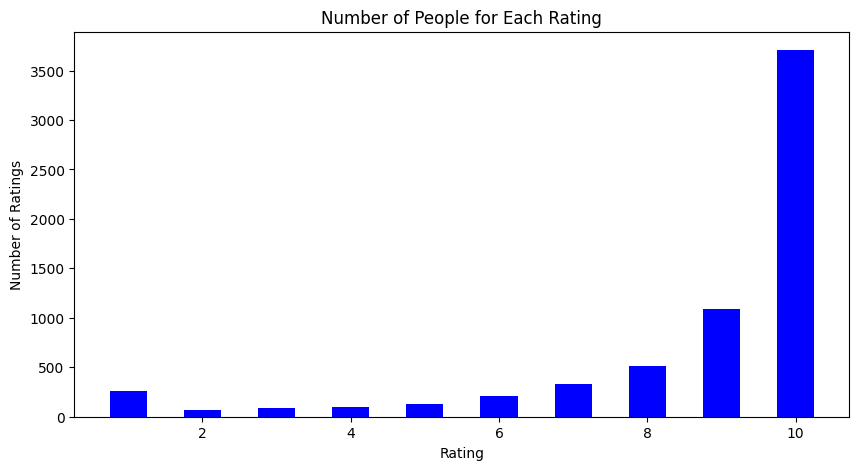

In [ ]:
y = [0 for i in range(10)]
x = [(i+1) for i in range(10)]

print(data_dict["The Dark Knight"][0])

for comment in data_dict["The Dark Knight"]:
    if comment["rating"] != "Null":
        y[int(comment["rating"])-1] += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color ='blue', width = 0.5)
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Number of People for Each Rating")
plt.show()

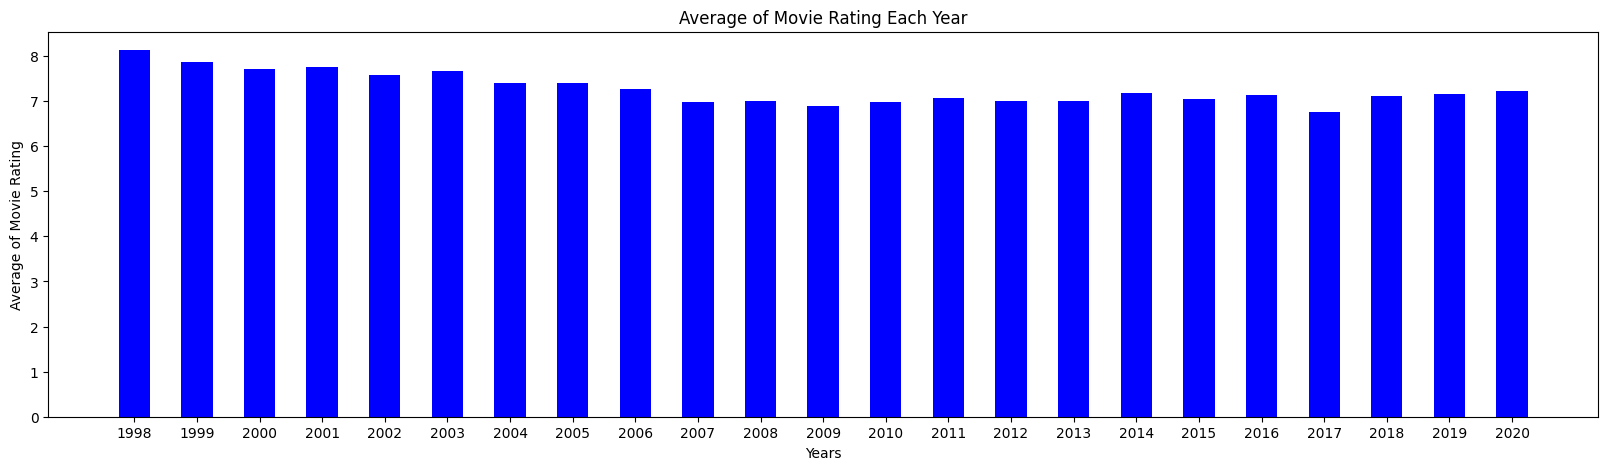

In [ ]:
x = []
y = []

items = sorted(list(yearRating.items()))
for year, rating in items:
    x.append(year)
    y.append(sum(rating)/len(rating))

fig = plt.figure(figsize = (20, 5))
plt.bar(x, y, color ='blue', width = 0.5)
plt.xlabel("Years")
plt.ylabel("Average of Movie Rating")
plt.title("Average of Movie Rating Each Year")
plt.show()

In [ ]:
betaU = {}
betaI = {}

ratings = [r["rating"] for r in movie_ratings]
globalAverage = sum(ratings) * 1.0 / len(ratings)

for u in betaU_dict:
    betaU[u] = betaU_dict[u][0] / betaU_dict[u][1] - globalAverage

for m in betaI_dict:
    betaI[m] = betaI_dict[m][0] / betaI_dict[m][1] - globalAverage

## Average rating per genres

In [8]:
def addlabels(x, y, fontSize=8, height=0.1):
    y = [round(num, 2) for num in y]
    for i in range(len(x)):
        plt.text(i, y[i]+height, y[i], ha = 'center', fontsize=fontSize)

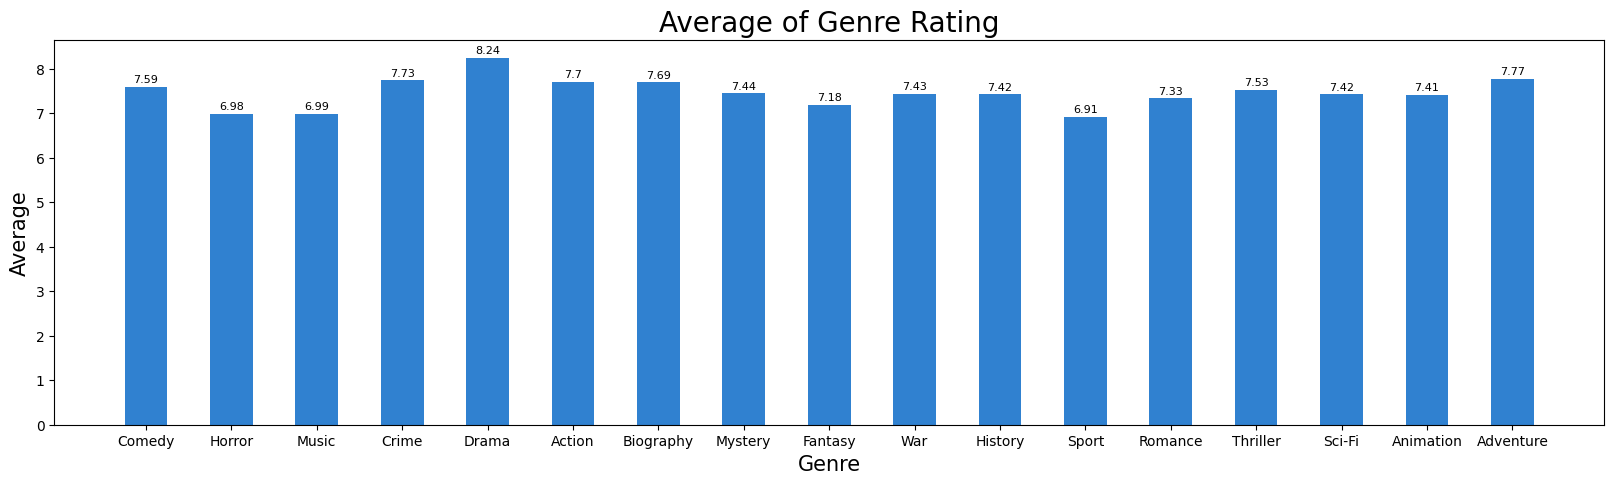

In [9]:
genre_rating = {}
for gen in genres:
    avg_rating = 0.
    for movie in genre_dict[gen]:
        avg_rating += float(movie['rating'])
    genre_rating[gen] = avg_rating / len(genre_dict[gen])

x = range(len(genre_rating))
y = list(genre_rating.values())

fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(x, y, tick_label=list(genre_rating.keys()), color ='#3081D0', width = 0.5)
addlabels(x, y)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Average", fontsize=15)
plt.title("Average of Genre Rating", fontsize=20)
plt.show()

## Length of movie timeline

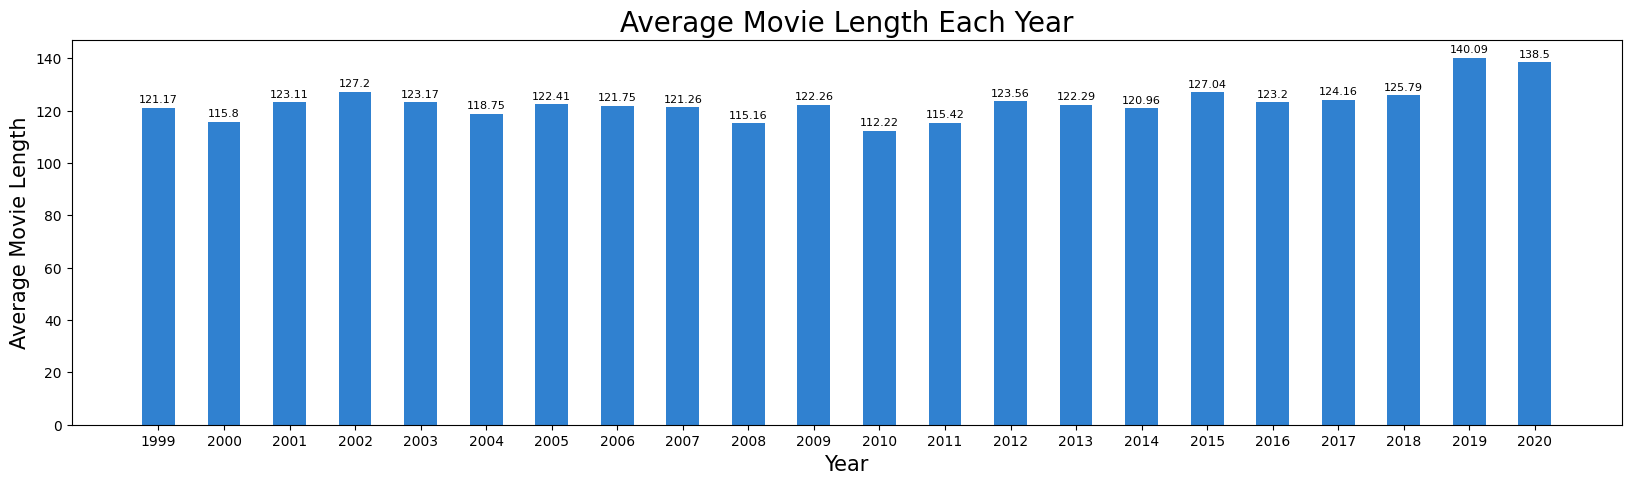

In [10]:
yearLength = defaultdict(list)
for gen in genre_dict.values():
    for movie in gen:
        if len(movie['run_length']) == 2:
            movie_length = datetime.datetime.strptime(movie['run_length'], '%Hh').time()
        else:
            movie_length = datetime.datetime.strptime(movie['run_length'], '%Hh %Mmin').time()
        yearLength[movie['year']].append(movie_length)

yearAvgLen = {}
for year, time in yearLength.items():
    minSum = 0
    for t in time:
        minSum += t.hour * 60 + t.minute
    yearAvgLen[int(year)] = minSum / len(time)

y = []
label = []
for key in sorted(yearAvgLen.keys()):
    if key < 1999:
        continue
    y.append(yearAvgLen[key])
    label.append(key)
x = range(len(y))

fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(x, y, tick_label=label, color='#3081D0', width=0.5)
addlabels(x, y, 8, 2)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Movie Length", fontsize=15)
plt.title("Average Movie Length Each Year", fontsize=20)
plt.show()

## Movie per user prediction

### Would Watch

#### Jaccard Similarity

In [11]:
def Jaccard(s1, s2):
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [12]:
def isPlayed(u, i, func, thres):
    similarities = []
    users = usersPerMovie[i]
    candidateMovies = set()
    for u in users:
        candidateMovies = candidateMovies.union(moviesPerUser[u])
    for i2 in candidateMovies:
        if i2 == i: continue
        sim = func(users, usersPerMovie[i2])
        similarities.append(sim)
    if not similarities:
        return False
    similarities.sort()

    # return similarities[-1] >= thres

    return statistics.mean(similarities[-3:]) > thres

In [26]:
samples = []
flaseSampleNum = 1
falseMovieUserPair = set()
for movie, comments in movieUserPair:
    for comment in comments:
        user = comment["username"]
        samples.append([(movie, comment['username']), True])

        for _ in range(flaseSampleNum):
            while True:
                false_movie = random.choices([*movies],k=1)[0]['name']
                false_sample = (user, false_movie)
                if false_sample not in movieUserPair and false_sample not in falseMovieUserPair:
                    break
            falseMovieUserPair.add(false_sample)
            samples.append([false_sample, False])

KeyboardInterrupt: ignored

In [29]:
random.seed(666)
random.shuffle(samples)
trian_sample = samples[:int(0.9*len(samples))]
valid_sample = samples[int(0.9*len(samples)):]

In [ ]:
correct = 0
thres = 0.001

for s in trian_sample:
    played = isPlayed(s[0][0], s[0][1], Jaccard, thres)
    popular = len(usersPerMovie[s[0][1]]) > 60
    if (s[1] and played) or (s[1] and popular) or (not s[1] and not played and not popular):
        correct += 1
print(correct / len(samples))

#### BayesianPersonalizedRanking

In [ ]:
Xui = scipy.sparse.lil_matrix((len(userIDs), len(movieIDs)))
for pair, label in samples:
    if not label:
        continue
    Xui[userIDs[pair[0]], movieIDs[pair[1]]] = 1

Xui_csr = scipy.sparse.csr_matrix(Xui)

In [ ]:
model = bpr.BayesianPersonalizedRanking()
model.fit(Xui_csr)

In [ ]:
correct = 0
num_recommended = 200

for s in samples:
    recommended = model.recommend(userIDs[u], Xui_csr[userIDs[u]], N=num_recommended)
    rcmSet = {s for s in recommended}
    if (s[1] and s[0] in rcmSet) or (not s[1] and s[0] not in rcmSet):
        correct += 1
print(correct / len(samples))

#### Logistic

In [ ]:
def BER(pred, ground_truth):
    TP_ = numpy.logical_and(pred, ground_truth)
    FP_ = numpy.logical_and(pred, numpy.logical_not(ground_truth))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ground_truth))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ground_truth)

    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)

    return 1 - 0.5*(TP / (TP + FN) + TN / (TN + FP)

In [ ]:
model = linear_model.LogisticRegression(C=1, random_state=0, max_iter=500000)